# Import Library

Library-library yang kami gunakan, sebagai berikut:

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime as dt
from sklearn import preprocessing
import math
import time
from pandas import datetime
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN
from tensorflow import keras
from tensorflow.keras import layers

C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11824\3319097961.py:11: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


Membuat display HTML dalam membuat judul pada codingan ini

In [2]:
from IPython.core.display import display, HTML

display(HTML('<h1><center>Project LSTM Kelompok G</center></h1>'))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11824\2334636164.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Masuk Pada Dataset

Memanggil dataset

In [3]:
#Menginisialisasi dataset ke dalam variabel df
df = pd.read_csv("TLK 2jan03-30des23.csv")

#Untuk mengetahui values dari dataset
df.isnull().values.any()

False

Menampilkan bagian atas dari dataset

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-12-31,4.180,4.255,4.180,4.245,1.965326,61200
1,2003-01-02,4.225,4.225,4.160,4.175,1.932918,204800
2,2003-01-03,4.190,4.225,4.190,4.205,1.946807,159000
3,2003-01-06,4.000,4.145,3.985,4.105,1.900510,675800
4,2003-01-07,3.985,3.995,3.945,3.970,1.838008,635400


# Eksplorasi Data

Merujuk ke df (dimana merupakan perwakilan dari objek dataframe pandas)

In [5]:
type(df)

pandas.core.frame.DataFrame

Mengecek apakah terdapat data null pada dataset/tidak

In [7]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Menghapus kolom yang tidak digunakan dengan menggunakan drop

In [8]:
df = df.drop(['Adj Close', 'Volume'], axis='columns')

In [9]:
#Menampilkan head data setelah menghapus kolom 'Adj Close' dan 'Volume'
df.head()

,Date,Open,High,Low,Close
0,2002-12-31,4.180,4.255,4.180,4.245
1,2003-01-02,4.225,4.225,4.160,4.175
2,2003-01-03,4.190,4.225,4.190,4.205
3,2003-01-06,4.000,4.145,3.985,4.105
4,2003-01-07,3.985,3.995,3.945,3.970


Menampilkan tipe data dari kolom dataset yang tersisa

In [10]:
print(df.dtypes)

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object


In [11]:
df

,Date,Open,High,Low,Close
0,2002-12-31,4.180000,4.255000,4.180000,4.245000
1,2003-01-02,4.225000,4.225000,4.160000,4.175000
2,2003-01-03,4.190000,4.225000,4.190000,4.205000
3,2003-01-06,4.000000,4.145000,3.985000,4.105000
4,2003-01-07,3.985000,3.995000,3.945000,3.970000
...,...,...,...,...,...
5031,2022-12-23,23.879999,24.040001,23.770000,24.030001
5032,2022-12-27,24.129999,24.139999,23.850000,23.900000
5033,2022-12-28,23.650000,23.770000,23.309999,23.420000
5034,2022-12-29,23.990000,23.990000,23.500000,23.680000


Mengubah tanggal menjadi index

In [12]:
con = df['Date']
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

#check datatype of index
df.index

DatetimeIndex(['2002-12-31', '2003-01-02', '2003-01-03', '2003-01-06',
               '2003-01-07', '2003-01-08', '2003-01-09', '2003-01-10',
               '2003-01-13', '2003-01-14',
               ...
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Date', length=5036, freq=None)

In [13]:
df

,Open,High,Low,Close
Date,,,,
2002-12-31,4.180000,4.255000,4.180000,4.245000
2003-01-02,4.225000,4.225000,4.160000,4.175000
2003-01-03,4.190000,4.225000,4.190000,4.205000
2003-01-06,4.000000,4.145000,3.985000,4.105000
2003-01-07,3.985000,3.995000,3.945000,3.970000
...,...,...,...,...
2022-12-23,23.879999,24.040001,23.770000,24.030001
2022-12-27,24.129999,24.139999,23.850000,23.900000
2022-12-28,23.650000,23.770000,23.309999,23.420000


Menginisialkan variable data time series

In [14]:
hg = pd.Series(df['High'])
op = pd.Series(df['Open'])
lw = pd.Series(df['Low'])
cl = pd.Series(df['Close'])

# Visualization Data

Menampilkan visualisasi data dari kolom yang tidak di drop sebelumnya

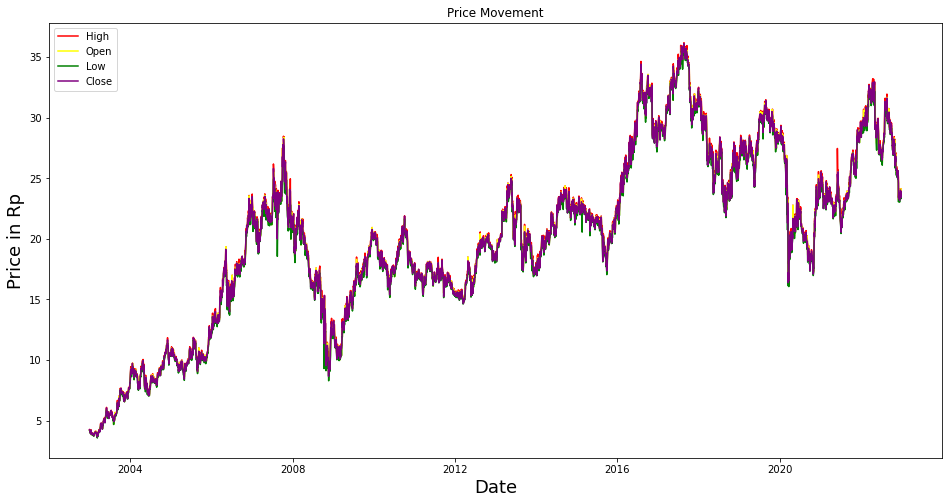

In [15]:
#Visualisasi Dataset

plt.figure(figsize=(16,8))
plt.title('Price Movement')
plt.plot(hg, color = 'red', label = 'High')
plt.plot(op, color = 'yellow', label = 'Open')
plt.plot(lw, color = 'green', label = 'Low')
plt.plot(cl, color = 'purple', label = 'Close')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price in Rp', fontsize=18)
plt.legend(loc='best')
plt.show()

Membuat data frame dari kolom 'High' dan membuat data train & test

In [16]:
data = pd.DataFrame(df['High'])

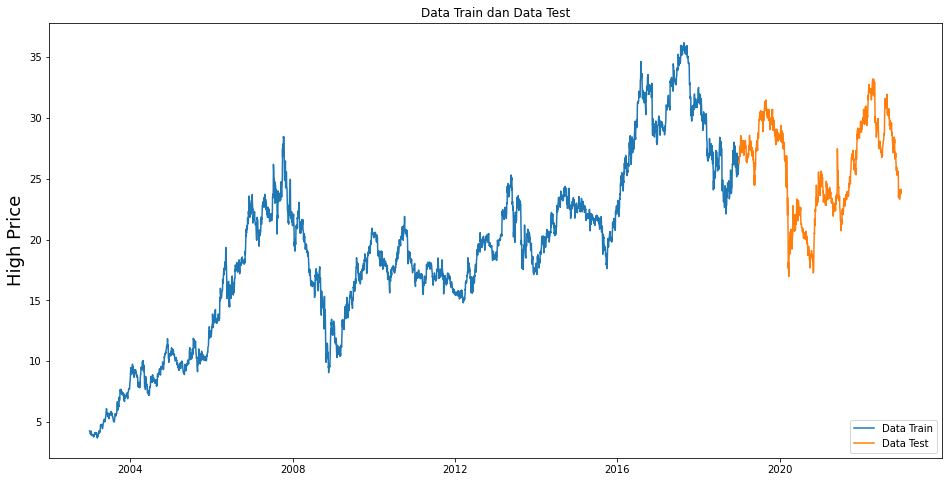

In [17]:
df_train = data[0:int(len(data)*0.8)]
df_test = data[int(len(data)*0.8):]
# plot the data
# Visualisasi data
plt.figure(figsize=(16,8))
plt.title('Data Train dan Data Test')
plt.ylabel('High Price', fontsize=18)
plt.plot(df_train)
plt.plot(df_test)
plt.legend(['Data Train', 'Data Test'], loc='lower right')
plt.show()

# Preprocessing

Melakukan scaling data (menggunakan kolom High)

In [629]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
dataset = min_max_scaler.fit_transform(df['High'].values.reshape(-1, 1))

Membagi data menjadi data train dan data test

In [630]:
dataset[0:10]

array([[0.01798893],
       [0.01706642],
       [0.01706642],
       [0.0146064 ],
       [0.00999385],
       [0.0101476 ],
       [0.0146064 ],
       [0.0149139 ],
       [0.01476015],
       [0.01752768]])

In [631]:
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

4028 1008


In [632]:
#Menampilkan panjang/jumlah dataframe
print(len(df))

5036


Konversi value array kedalam dataset matriks

In [633]:
def create_dataset(dataset, look_back=15):
    x, y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        x.append(a)
        y.append(dataset[i + look_back, 0])
    return np.array(x), np.array(y)

In [634]:
look_back = 15
x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

In [635]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4012, 15)
(4012,)
(992, 15)
(992,)


Reshape input menjadi 3D yaitu [samples, time step, dan feature]

In [636]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

# Model

Membuat model LSTM

In [637]:
look_back = 15

model1 = Sequential()

model1.add(LSTM(50, input_shape=(1, look_back), return_sequences=False))

# Dropout to prevent overfitting
model1.add(Dropout(0.5))

# Dense layer for classification output
model1.add(Dense(units=1, activation='tanh'))

# Optimizing the neural network weights
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

# Compiling the model with the optimizer
model1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

history = model1.fit(x_train, y_train, epochs=100, batch_size=64, verbose=2, validation_data=(x_test, y_test))


Epoch 1/100
63/63 - 3s - loss: 0.6912 - accuracy: 4.9850e-04 - val_loss: 0.6015 - val_accuracy: 0.0000e+00 - 3s/epoch - 55ms/step
Epoch 2/100
63/63 - 0s - loss: 0.5996 - accuracy: 4.9850e-04 - val_loss: 0.5962 - val_accuracy: 0.0000e+00 - 234ms/epoch - 4ms/step
Epoch 3/100
63/63 - 0s - loss: 0.5955 - accuracy: 4.9850e-04 - val_loss: 0.5937 - val_accuracy: 0.0000e+00 - 241ms/epoch - 4ms/step
Epoch 4/100
63/63 - 0s - loss: 0.5946 - accuracy: 4.9850e-04 - val_loss: 0.5934 - val_accuracy: 0.0000e+00 - 241ms/epoch - 4ms/step
Epoch 5/100
63/63 - 0s - loss: 0.5930 - accuracy: 4.9850e-04 - val_loss: 0.5931 - val_accuracy: 0.0000e+00 - 244ms/epoch - 4ms/step
Epoch 6/100
63/63 - 0s - loss: 0.5921 - accuracy: 4.9850e-04 - val_loss: 0.5924 - val_accuracy: 0.0000e+00 - 243ms/epoch - 4ms/step
Epoch 7/100
63/63 - 0s - loss: 0.5912 - accuracy: 4.9850e-04 - val_loss: 0.5927 - val_accuracy: 0.0000e+00 - 244ms/epoch - 4ms/step
Epoch 8/100
63/63 - 0s - loss: 0.5908 - accuracy: 4.9850e-04 - val_loss: 0.591

In [638]:
mseplot = model1.compile(loss='mean_squared_error', optimizer=opt, metrics=['mse'])
 
mseplot = model1.fit(x_train, y_train, epochs = 100, batch_size=64, verbose=2, validation_data=(x_test, y_test))

Epoch 1/100
63/63 - 3s - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0043 - val_mse: 0.0043 - 3s/epoch - 51ms/step
Epoch 2/100
63/63 - 0s - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0049 - val_mse: 0.0049 - 214ms/epoch - 3ms/step
Epoch 3/100
63/63 - 0s - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0043 - val_mse: 0.0043 - 220ms/epoch - 3ms/step
Epoch 4/100
63/63 - 0s - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0045 - val_mse: 0.0045 - 218ms/epoch - 3ms/step
Epoch 5/100
63/63 - 0s - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0039 - val_mse: 0.0039 - 218ms/epoch - 3ms/step
Epoch 6/100
63/63 - 0s - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0047 - val_mse: 0.0047 - 220ms/epoch - 3ms/step
Epoch 7/100
63/63 - 0s - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0037 - val_mse: 0.0037 - 223ms/epoch - 4ms/step
Epoch 8/100
63/63 - 0s - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0035 - val_mse: 0.0035 - 219ms/epoch - 3ms/step
Epoch 9/100
63/63 - 0s - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0034 - val_mse: 0.0034 -

In [639]:
model1.compile(loss='mse', optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])

rmseplot = model1.fit(x_train, y_train, epochs = 100, batch_size=64, verbose=2, validation_data=(x_test, y_test))

Epoch 1/100
63/63 - 2s - loss: 0.0063 - rmse: 0.0792 - val_loss: 0.0033 - val_rmse: 0.0575 - 2s/epoch - 39ms/step
Epoch 2/100
63/63 - 0s - loss: 0.0061 - rmse: 0.0780 - val_loss: 0.0026 - val_rmse: 0.0507 - 226ms/epoch - 4ms/step
Epoch 3/100
63/63 - 0s - loss: 0.0063 - rmse: 0.0793 - val_loss: 0.0022 - val_rmse: 0.0470 - 235ms/epoch - 4ms/step
Epoch 4/100
63/63 - 0s - loss: 0.0064 - rmse: 0.0798 - val_loss: 0.0029 - val_rmse: 0.0542 - 234ms/epoch - 4ms/step
Epoch 5/100
63/63 - 0s - loss: 0.0062 - rmse: 0.0790 - val_loss: 0.0022 - val_rmse: 0.0470 - 234ms/epoch - 4ms/step
Epoch 6/100
63/63 - 0s - loss: 0.0066 - rmse: 0.0812 - val_loss: 0.0015 - val_rmse: 0.0393 - 235ms/epoch - 4ms/step
Epoch 7/100
63/63 - 0s - loss: 0.0064 - rmse: 0.0802 - val_loss: 0.0014 - val_rmse: 0.0372 - 238ms/epoch - 4ms/step
Epoch 8/100
63/63 - 0s - loss: 0.0063 - rmse: 0.0797 - val_loss: 0.0023 - val_rmse: 0.0481 - 235ms/epoch - 4ms/step
Epoch 9/100
63/63 - 0s - loss: 0.0066 - rmse: 0.0810 - val_loss: 0.0026 - 

In [640]:
score = model1.evaluate(x_train, y_train, batch_size = 32, verbose = 2)
print('Train Accuracy:', score[1])

126/126 - 0s - loss: 0.0011 - rmse: 0.0328 - 168ms/epoch - 1ms/step
Train Accuracy: 0.03278999775648117


# Tuning Test

Membuat tuning test dari hasil model yang telah dibuat dengan menggunakan perbandingan yang lainnya

In [641]:
print("Shape x_train:", x_train.shape)
# Output: (jumlah_sampel, timesteps, features)

# Misalkan y_train adalah dataset target
print("Shape y_train:", y_train.shape)
# Output: (jumlah_sampel,)

# Ambil nilai timesteps dari x_train
timesteps = x_train.shape[1]
print("Timesteps:", timesteps)

# Ambil nilai features dari x_train
features = x_train.shape[2]
print("Features:", features)


Shape x_train: (4012, 1, 15)
Shape y_train: (4012,)
Timesteps: 1
Features: 15


In [644]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Placeholder values for timesteps and features
timesteps = 1
features = 15

# Fungsi untuk membuat model LSTM
def create_model(units=50, activation='tanh', optimizer='opt'):
    model = Sequential()
    model.add(LSTM(units=units, activation=activation, input_shape=(timesteps, features)))
    model.add(Dense(1))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Membuat objek KerasClassifier
model = KerasClassifier(build_fn=create_model)

# Mendefinisikan hyperparameter yang ingin diuji
param_grid = {
    'units': [50, 100, 200],
    'activation': ['tanh', 'sigmoid'],
    'optimizer': ['adam', 'rmsprop']
}

# Membuat objek GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Melakukan proses tuning dengan fit
grid_search.fit(x_train, y_train)

# Menampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

# Menampilkan skor akurasi terbaik
print("Skor akurasi terbaik:", grid_search.best_score_)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11824\3761055048.py:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model)


126/126 [==============================] - 3s 4ms/step - loss: -6754.9287 - accuracy: 2.4925e-04
Parameter terbaik: {'activation': 'tanh', 'optimizer': 'adam', 'units': 100}
Skor akurasi terbaik: 0.0948941469192505


# Visualisasi Model LSTM

In [645]:
train_predict = model1.predict(x_train)
test_predict = model1.predict(x_test)


# #invert prediksi

train_predict = min_max_scaler.fit_transform(train_predict)
y_train = min_max_scaler.inverse_transform([y_train])

test_predict = min_max_scaler.inverse_transform(test_predict)
y_test = min_max_scaler.inverse_transform([y_test])

#kalkulasi untuk root mean squared error

train_score = math.sqrt(mean_squared_error(y_train[0], train_predict[:,0]))
print('Train score: %.2f RMSE' % (train_score))

test_score = math.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
print('Test score: %.2f RMSE' % (test_score))

#hitung MSE
train_score1 = mean_squared_error(y_train[0], train_predict[:,0])
print('Train score: %.2f MSE' % (train_score1))

test_score1 = mean_squared_error(y_test[0], test_predict[:,0])
print('Train score: %.2f MSE' % (test_score1))

31/31 [==============================] - 0s 2ms/step
Train score: 0.07 RMSE
Test score: 0.04 RMSE
Train score: 0.01 MSE
Train score: 0.00 MSE


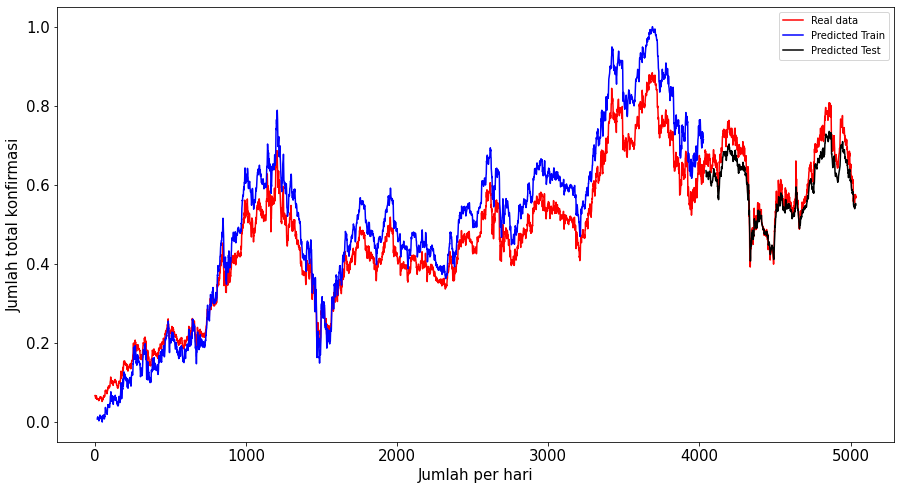

In [646]:
#plotting untuk train prediction
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict)+look_back, :] = train_predict

# plotting untuk test prediction
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(look_back*2)+1:len(dataset)-1, :] = test_predict

#plot
plt.figure(figsize=(15, 8))
plt.plot(min_max_scaler.inverse_transform(dataset), color='r', label='Real data')
plt.plot(train_predict_plot, color='b', label='Predicted Train')
plt.plot(test_predict_plot, color='black', label = 'Predicted Test')
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel("Jumlah per hari", size=15)
plt.ylabel("Jumlah total konfirmasi", size=15)
plt.legend(loc='best')
plt.show()

# Kesimpulan

- Kami menggunakan dataset dari TLKM dengan tujuan untuk memprediksi saham.
- Untuk melakukan prediksi, kami menggunakan algoritma LSTM (Long Short-Term Memory)
- Pada bagian awal, kami menggunakan beberap kolom dalam membuat visualisasi data yaitu High, Open, Low, Close. Namun yang kami fokuskan pada penerapan algoritma ini, kami menggunakan kolom High saja.
- Setelah itu membuat visualisasi antara data train dan test dari kolom high
- Melakukan scaling data dan mengubah data ke matriks.
- Membuat model lstm dengan menggunakan fungsi Squential(), activation: 'tanh' dengan optimizer menggunakan adam. Selain itu, kami menggunakan epochs:100 dan validasi datanya menggunakan x test dan y test
- Mengevaluasi model dan menghasilkan Train Accuracy: 0.03278999775648117. Walaupun masih terbilang rendah namun kami juga melakukan tuning test untuk melihat parameter mana yang terbaik beserta . Dan setelah melakukan tuning test, parameter yang terbaik digunakan adalah tunh.
- Membuat visualisasi model lstm dengan melakukan kalkulasi root mean squared error. Secara keseluruhan outputnya tidak mencapai 0 tapi setidaknya menurut kami output tersebut sudah cukup baik karena perbedaannya tidak sangat jauh untuk mendekati 0
- Membuat plot untuk melihat visualisasi dari data asli dan data model lstm yang telah dibuat. Dari visualisasi tersebut, data yang dihasilkan tidak terlalu overfitting
- Membuat visualisasi MSE dan RMSE pada setiap epochs

- Menurut kami untuk penerapan LSTM cukup baik digunakan karena menghasilkan data yang baik pula. Walaupun masih ada beberapa output yang belum sepenuhnya memenuhi, tetapi dapat diterapkan karena melakukan tuning test juga sehingga dapat lebih mengetahui dengan jelas apakah model yang diterapkan sudah baik untuk digunakan atau tidak